# NARDONE Arthur - Reinforcement Learning Assignment

In [2]:
import os, sys, time
import pickle
import gymnasium as gym

from tqdm import tqdm
import numpy as np
import pandas as pd
import matplotlib 
import matplotlib.pyplot as plt
matplotlib.style.use('fivethirtyeight')

import text_flappy_bird_gym
from src import sarsa_agent, q_agent, utils

## Agent n°1 - Q-Learning

### Base Agent not tuned

In [5]:
agent = q_agent.QLearningAgent()
agent_info = {"num_actions": 2, "epsilon": 0.1, "step_size": 0.7, "discount": 1.0}
num_runs = 10000

Q, rewards = utils.train_agent(agent_class=agent, agent_info=agent_info, epochs=num_runs)

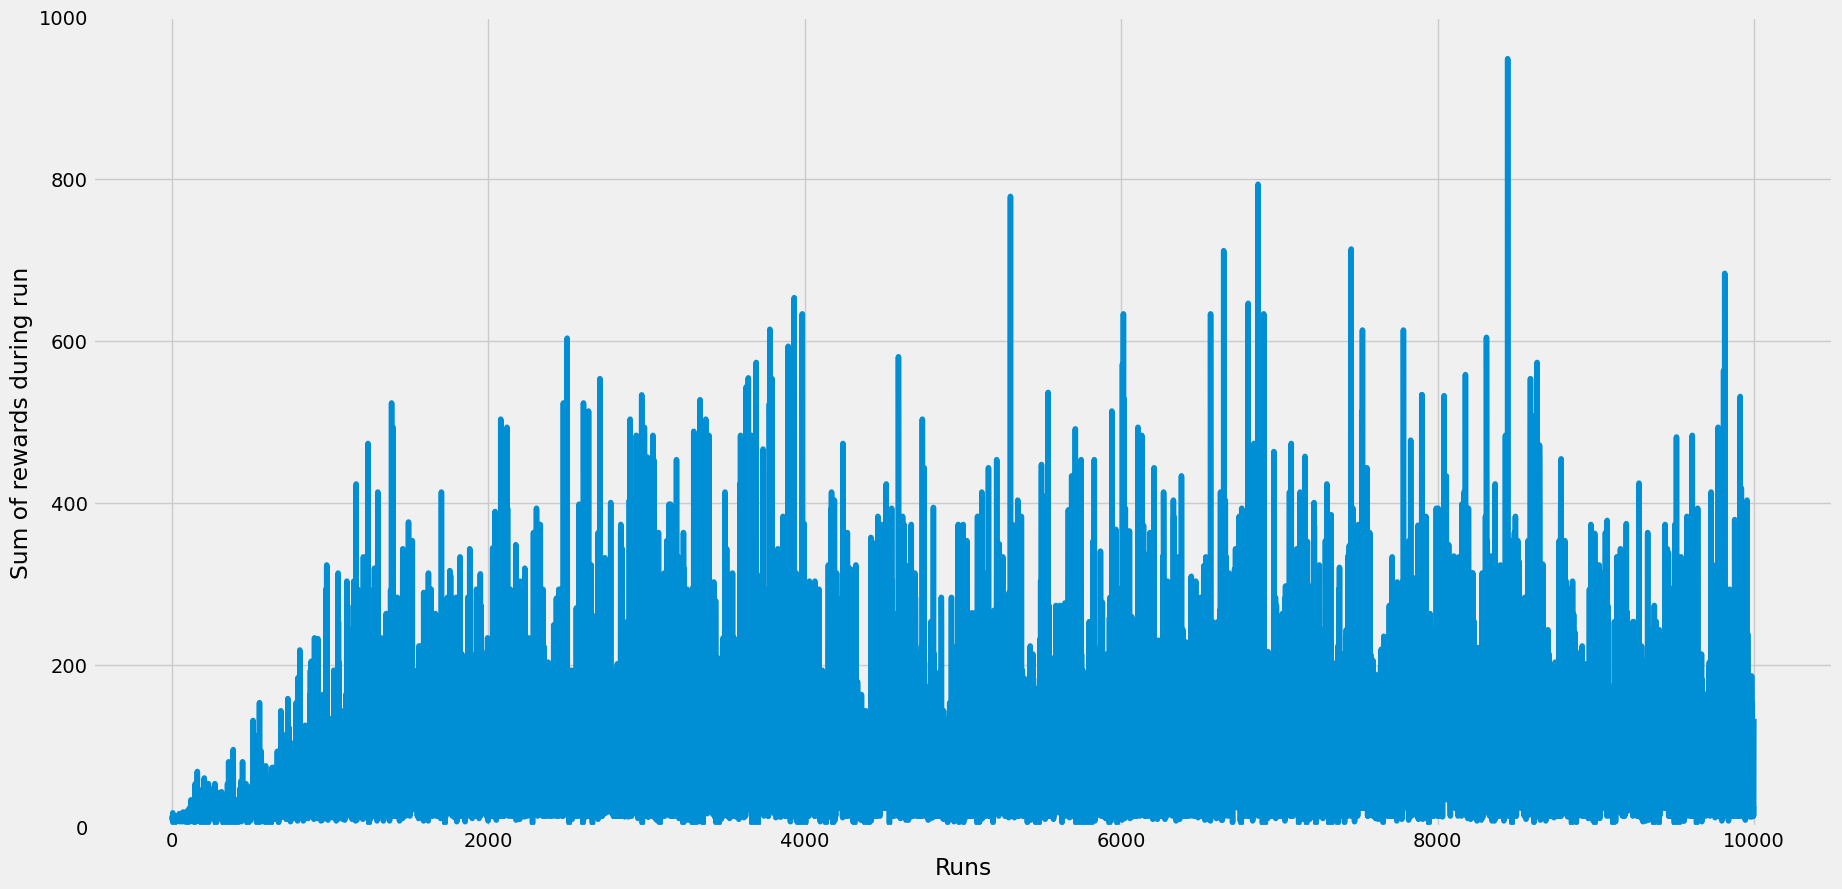

In [6]:
plt.figure(figsize=(20, 10))
x = np.arange(num_runs)
plt.plot(x, rewards)
plt.xlabel("Runs")
plt.ylabel("Sum of rewards during run", rotation=90)
plt.ylim(0, 1000)
plt.show()

## Hyperparemeters Sweep

In [9]:
epsilons = [0.05, 0.1, 0.15, 0.2, 0.25, 0.3]
step_sizes = [0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
discounts = [1.0, 0.95, 0.9, 0.85, 0.8, 0.75]
mean_rewards = []

df_hyperparameters = pd.DataFrame(columns=["Mean Reward", "Epsilon", "Step-Size", "Discount"])
index = 0
for epsilon in epsilons:
    for step_size in step_sizes:
        for discount in discounts:
            agent = q_agent.QLearningAgent()
            agent_info = {"num_actions": 2, "epsilon": epsilon, "step_size": step_size, "discount": discount}

            Q, rewards = utils.train_agent(agent_class=agent, agent_info=agent_info, epochs=num_runs)
            mean_rewards.append(np.mean(rewards))
            df_hyperparameters.loc[len(df_hyperparameters)] = [mean_rewards, epsilon, step_size, discount]

In [18]:
df_hyperparameters.head()

,Epsilon,Step-Size,Discount,Mean
0,0.05,0.4,1.00,176.8483
1,0.05,0.4,0.95,173.6934
2,0.05,0.4,0.90,138.6544
3,0.05,0.4,0.85,149.2010
4,0.05,0.4,0.80,157.9695


In [20]:
best = df_hyperparameters.iloc[df_hyperparameters['Mean'].argmax()]

In [22]:
best.head()

Epsilon        0.0500
Step-Size      0.6000
Discount       1.0000
Mean         184.7199
Name: 12, dtype: float64

So the best hyperparameters for a Q-Learning agent are the following :
- epsilon (𝞮) = 0.05
- step-size (⍺) = 0.6
- discount (Ɣ) = 1.0

If we want to have some plots of this results we can try to tune the hyperparameters sequentially

### Epsilon: ε

In [7]:
epsilons_rewards = []
epsilons = [0.05, 0.1, 0.15, 0.2, 0.25, 0.3]

for epsilon in tqdm(epsilons):
    agent = q_agent.QLearningAgent()
    agent_info = {"num_actions": 2, "epsilon": epsilon, "step_size": 0.7, "discount": 1.0}

    Q, rewards = utils.train_agent(agent_class=agent, agent_info=agent_info, epochs=10000)
    epsilons_rewards.append(np.mean(rewards))

100%|██████████| 6/6 [01:26<00:00, 14.38s/it]


Text(0.5, 1.0, 'Q-Learning: epsilon')

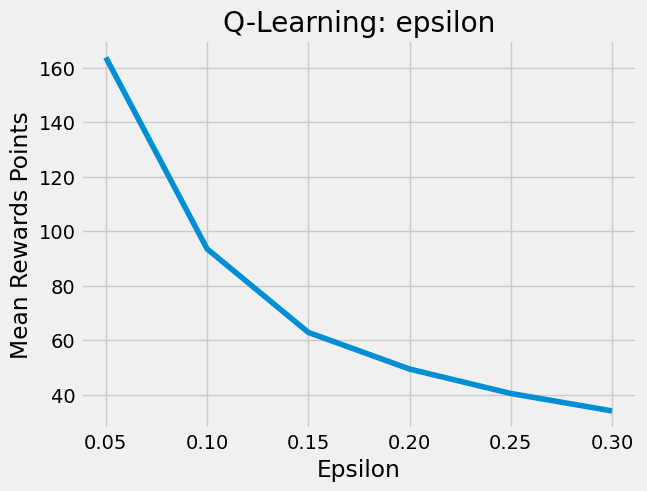

In [8]:
plt.plot(epsilons, epsilons_rewards)
plt.xlabel("Epsilon")
plt.ylabel("Mean Rewards Points", rotation=90)
plt.title("Q-Learning: epsilon")

### Step-Size: ⍺

In [9]:
step_sizes_rewards = []
step_sizes = [0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

for step_size in tqdm(step_sizes):
    agent = q_agent.QLearningAgent()
    agent_info = {"num_actions": 2, "epsilon": 0.05, "step_size": step_size, "discount": 1.0}

    Q, rewards = utils.train_agent(agent_class=agent, agent_info=agent_info, epochs=10000)
    step_sizes_rewards.append(np.mean(rewards))

100%|██████████| 6/6 [03:06<00:00, 31.02s/it]


Text(0.5, 1.0, 'Q-Learning: step-size ⍺')

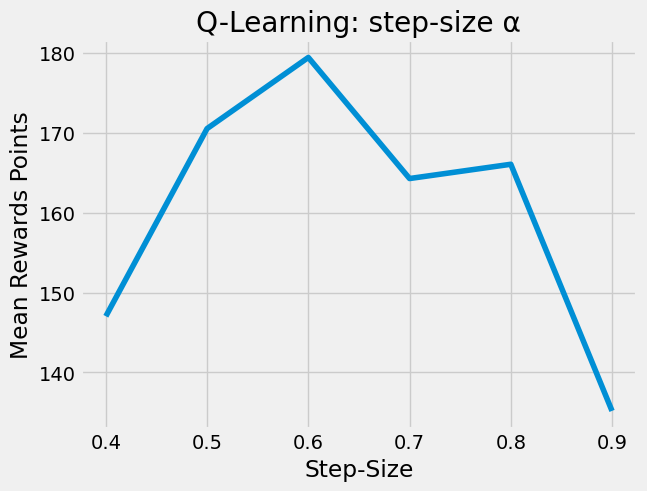

In [10]:
plt.plot(step_sizes, step_sizes_rewards)
plt.xlabel("Step-Size")
plt.ylabel("Mean Rewards Points", rotation=90)
plt.title("Q-Learning: step-size ⍺")

### Discount: Ɣ

In [14]:
discounts_rewards = []
discounts = [1.0, 0.95, 0.9, 0.85, 0.8, 0.75, 0.7]

for discount in tqdm(discounts):
    agent = q_agent.QLearningAgent()
    agent_info = {"num_actions": 2, "epsilon": 0.05, "step_size": 0.6, "discount": discount}

    Q, rewards = utils.train_agent(agent_class=agent, agent_info=agent_info, epochs=10000)
    discounts_rewards.append(np.mean(rewards))

100%|██████████| 7/7 [03:39<00:00, 31.37s/it]


Text(0.5, 1.0, 'Q-Learning: discount')

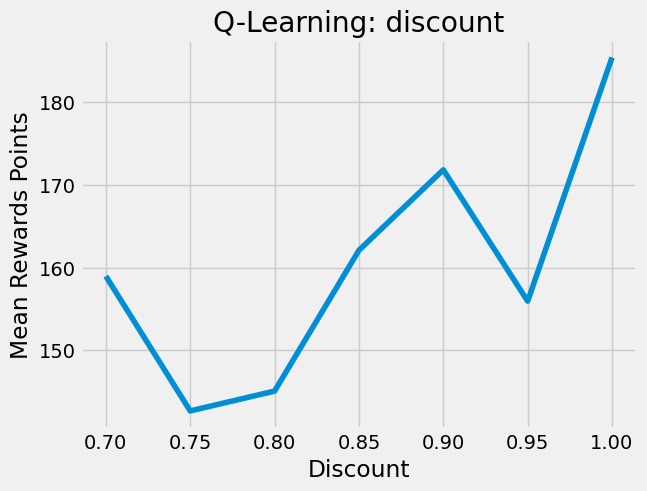

In [15]:
plt.plot(discounts, discounts_rewards)
plt.xlabel("Discount")
plt.ylabel("Mean Rewards Points", rotation=90)
plt.title("Q-Learning: discount")

We can see that the best discount to use to optimize the agent is discount = 1. So the agent considers with the same importance every rewards regardless how far they are.

So the best hyperparameters for a Q-Learning agent are the following :
- epsilon (𝞮) = 0.05
- step-size (⍺) = 0.6
- discount (Ɣ) = 1.0

Let's train the agent with these hyperparameters for 50,000 episodes:

In [16]:
agent = q_agent.QLearningAgent()
agent_info = {"num_actions": 2, "epsilon": 0.05, "step_size": 0.6, "discount": 1.0}

Q, rewards = utils.train_agent(agent_class=agent, agent_info=agent_info, epochs=50000)

In [20]:
# Save Q Table
os.makedirs('models', exist_ok=True)

with open('models/q_learning.pkl', 'wb') as pickle_file:
    pickle.dump(Q, pickle_file, protocol=pickle.HIGHEST_PROTOCOL)

In [2]:
with open('models/q_learning.pkl', 'rb') as pickle_file:
    Q = pickle.load(pickle_file)

### We can see the State-Value graph of this Q-Learning agent

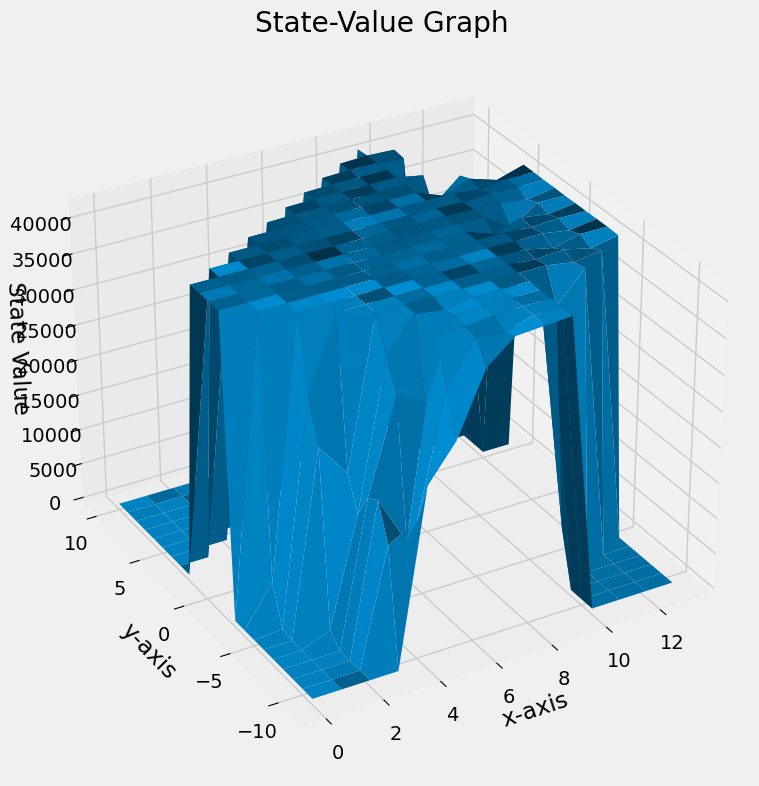

In [3]:
V = utils.get_state_value(Q)
utils.plot_state_values(V)

### Let's take a look at the policy graph

<Figure size 640x480 with 0 Axes>

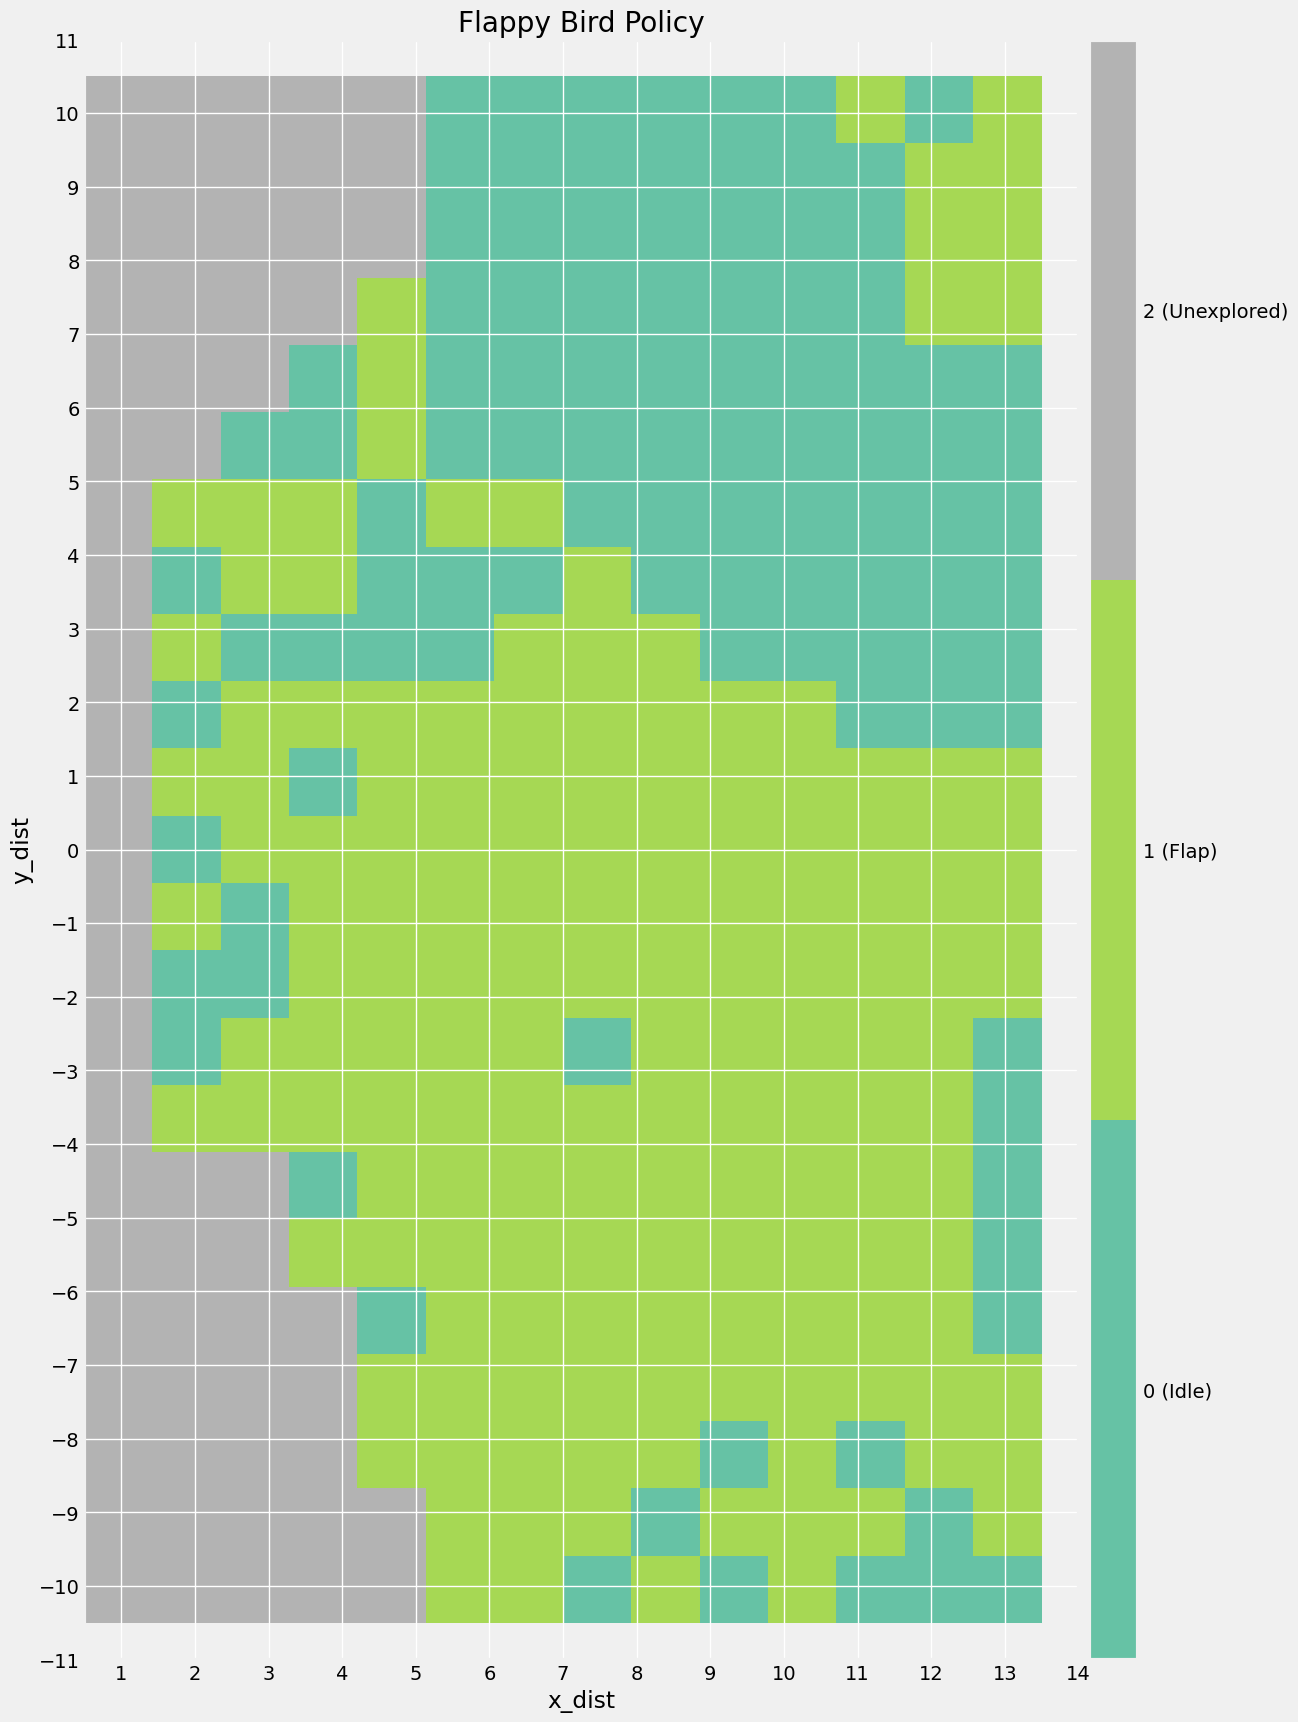

In [4]:
utils.plot_policy(Q)

## Agent n°2 - Expected Sarsa Agent

In [5]:
agent = sarsa_agent.ExpectedSarsaAgent()
agent_info = {"num_actions": 2, "epsilon": 0.1, "step_size": 0.7, "discount": 1.0}
num_runs = 10000

Q, rewards = utils.train_agent(agent_class=agent, agent_info=agent_info, epochs=num_runs)

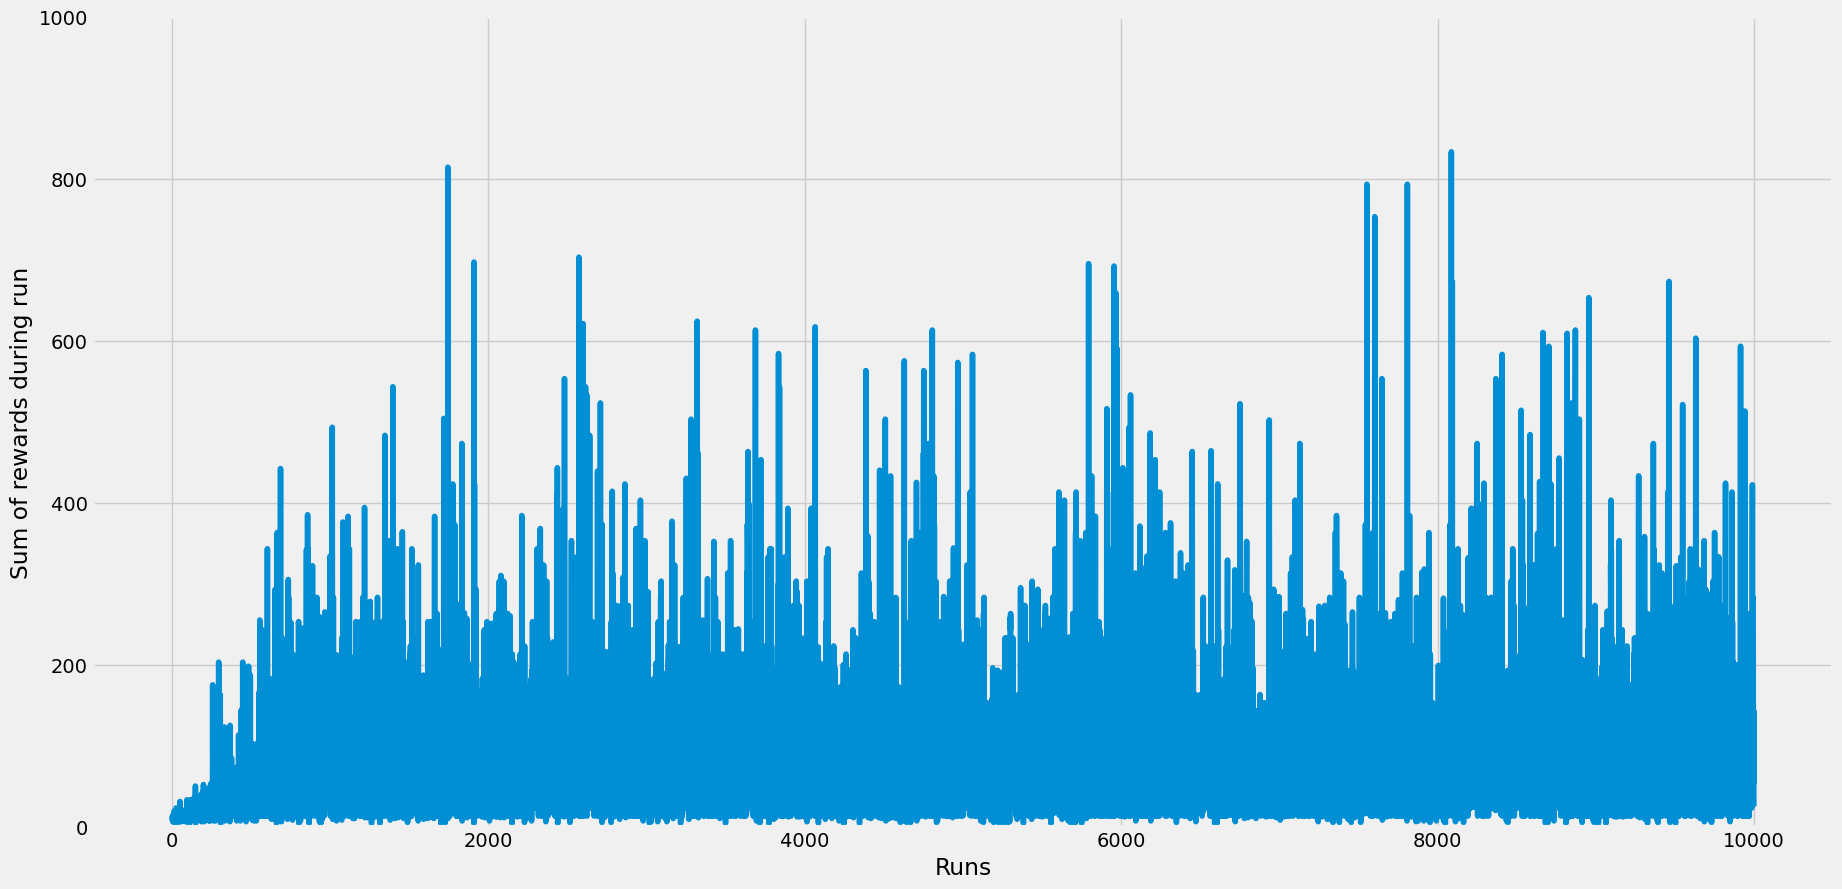

In [6]:
plt.figure(figsize=(20, 10))
x = np.arange(num_runs)
plt.plot(x, rewards)
plt.xlabel("Runs")
plt.ylabel("Sum of rewards during run", rotation=90)
plt.ylim(0, 1000)
plt.show()

## Hyper-parameters sweep

### Epsilon: ε

In [8]:
epsilons_rewards = []
epsilons = [0.05, 0.1, 0.15, 0.2, 0.25, 0.3]

for epsilon in tqdm(epsilons):
    agent = sarsa_agent.ExpectedSarsaAgent()
    agent_info = {"num_actions": 2, "epsilon": epsilon, "step_size": 0.7, "discount": 1.0}

    Q, rewards = utils.train_agent(agent_class=agent, agent_info=agent_info, epochs=10000)
    epsilons_rewards.append(np.mean(rewards))

100%|██████████| 6/6 [02:37<00:00, 26.33s/it]


Text(0.5, 1.0, 'Expected SARSA: epsilon')

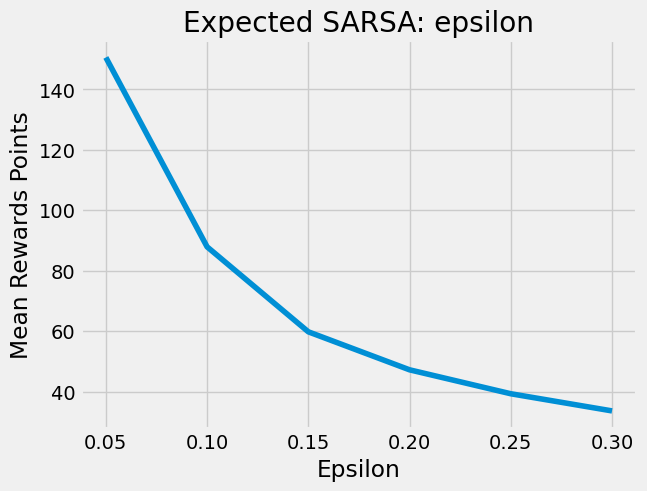

In [9]:
plt.plot(epsilons, epsilons_rewards)
plt.xlabel("Epsilon")
plt.ylabel("Mean Rewards Points", rotation=90)
plt.title("Expected SARSA: epsilon")

### Step-Size: ⍺

In [10]:
step_sizes_rewards = []
step_sizes = [0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

for step_size in tqdm(step_sizes):
    agent = sarsa_agent.ExpectedSarsaAgent()
    agent_info = {"num_actions": 2, "epsilon": 0.05, "step_size": step_size, "discount": 1.0}

    Q, rewards = utils.train_agent(agent_class=agent, agent_info=agent_info, epochs=10000)
    step_sizes_rewards.append(np.mean(rewards))

100%|██████████| 6/6 [05:52<00:00, 58.79s/it]


Text(0.5, 1.0, 'Expected SARSA: step-size ⍺')

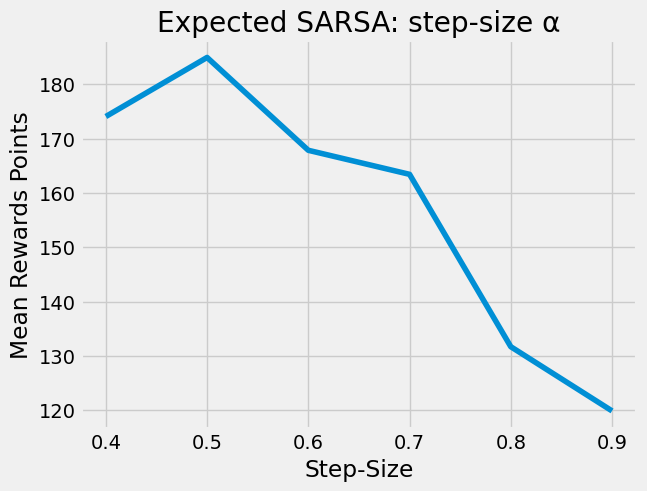

In [11]:
plt.plot(step_sizes, step_sizes_rewards)
plt.xlabel("Step-Size")
plt.ylabel("Mean Rewards Points", rotation=90)
plt.title("Expected SARSA: step-size ⍺")

### Discount: Ɣ

In [12]:
discounts_rewards = []
discounts = [1.0, 0.95, 0.9, 0.85, 0.8, 0.75, 0.7]

for discount in tqdm(discounts):
    agent = sarsa_agent.ExpectedSarsaAgent()
    agent_info = {"num_actions": 2, "epsilon": 0.05, "step_size": 0.5, "discount": discount}

    Q, rewards = utils.train_agent(agent_class=agent, agent_info=agent_info, epochs=10000)
    discounts_rewards.append(np.mean(rewards))

100%|██████████| 7/7 [07:22<00:00, 63.22s/it]


Text(0.5, 1.0, 'Expected SARSA: discount')

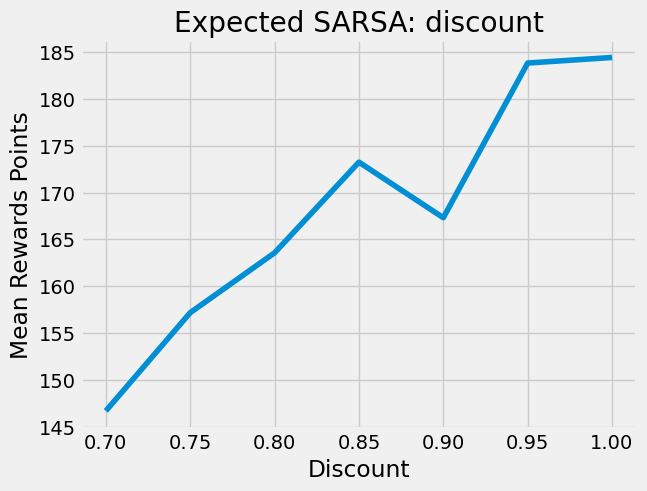

In [13]:
plt.plot(discounts, discounts_rewards)
plt.xlabel("Discount")
plt.ylabel("Mean Rewards Points", rotation=90)
plt.title("Expected SARSA: discount")

Same as the Q-Learning agent, our agent considers with the same importance every rewards regardless how far they are.

So the best hyperparameters for an Expected SARSA agent are the following :
- epsilon (𝞮) = 0.05
- step-size (⍺) = 0.5
- discount (Ɣ) = 1.0

Let's train the agent with these hyperparameters for 50,000 episodes:

In [3]:
agent = sarsa_agent.ExpectedSarsaAgent()
agent_info = {"num_actions": 2, "epsilon": 0.05, "step_size": 0.5, "discount": 1.0}

Q, rewards = utils.train_agent(agent_class=agent, agent_info=agent_info, epochs=50000)

In [4]:
# Save Q Table
os.makedirs('models', exist_ok=True)

with open('models/sarsa.pkl', 'wb') as pickle_file:
    pickle.dump(Q, pickle_file, protocol=pickle.HIGHEST_PROTOCOL)

In [5]:
with open('models/sarsa.pkl', 'rb') as pickle_file:
    Q = pickle.load(pickle_file)

### We can see the State-Value graph of this Q-Learning agent

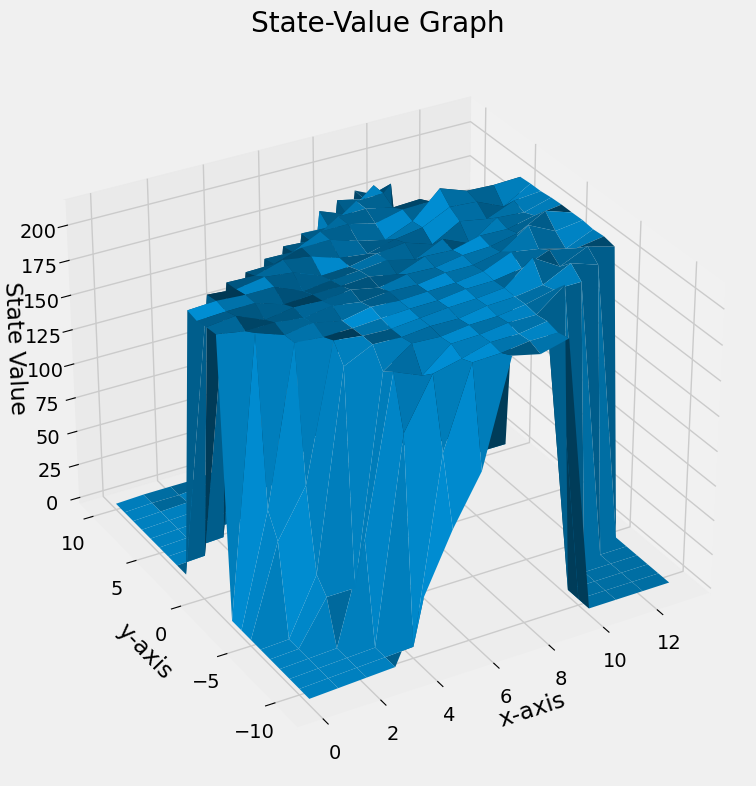

In [5]:
V = utils.get_state_value(Q)
utils.plot_state_values(V)

### Let's take a look at the policy graph

<Figure size 640x480 with 0 Axes>

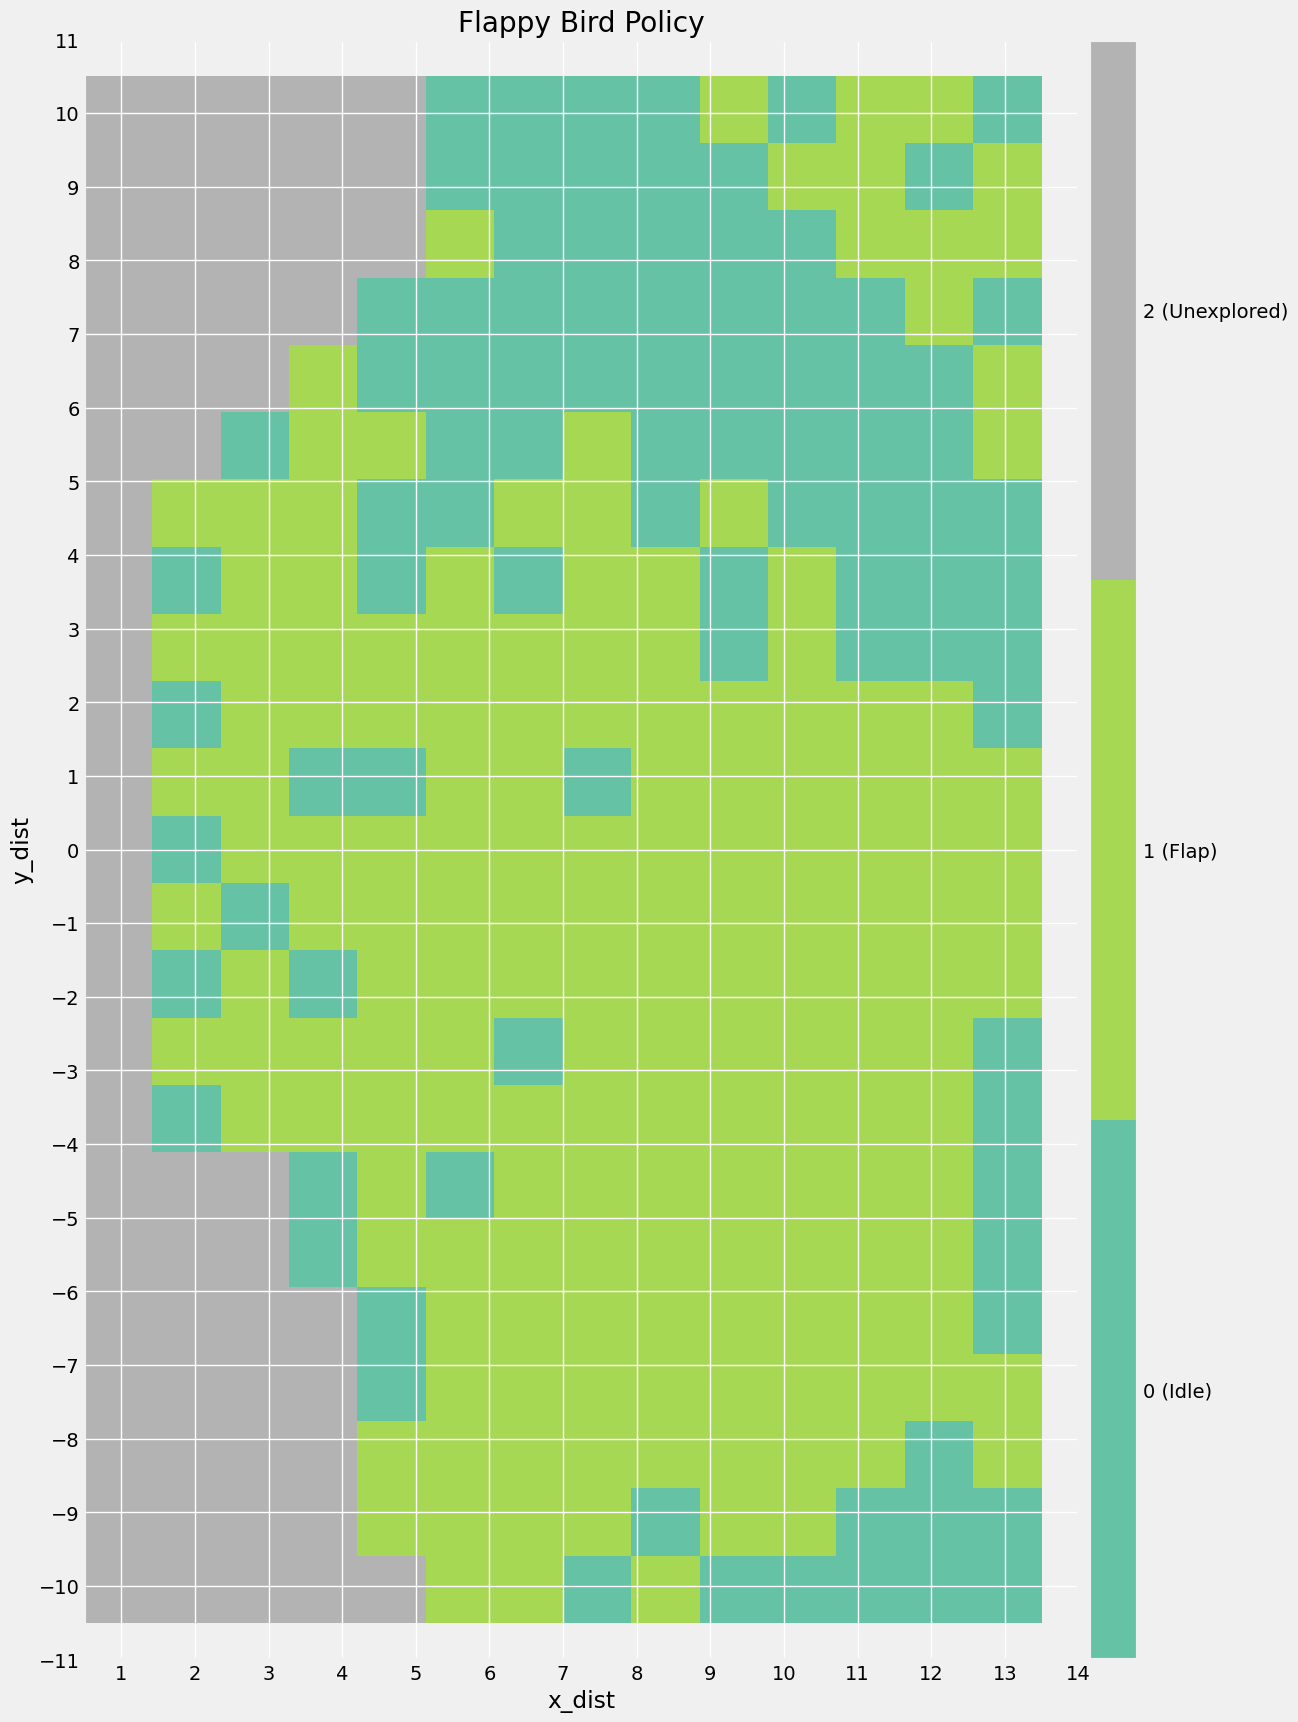

In [6]:
utils.plot_policy(Q)